In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import subprocess
import cv2
%matplotlib inline

In [2]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie

# hj map & Ina map & pvmap

In [3]:
hj_array = np.zeros((1001, 200, 200))
m_array = np.zeros((1001, 200, 200))
Ina = np.zeros((1001, 200, 200))

In [4]:
for i in range(400):
    num = '{0:04d}'.format(i)
    a = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'h.npy'))
    b = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'j.npy'))
    hj_array[i, :, :] = a*b
    m_array[i, :, :] = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'm.npy'))
    Ina[i, :, :] = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'xina.npy'))
for i in range(200):
    num = '{0:04d}'.format(i)
    a = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'h.npy'))
    b = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'j.npy'))
    hj_array[i+400, :, :] = a*b
    m_array[i+400, :, :] = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'm.npy'))
    Ina[i+400, :, :] = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'xina.npy'))
for i in range(400):
    num = '{0:04d}'.format(i)
    a = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'h.npy'))
    b = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'j.npy'))
    hj_array[i+600, :, :] = a*b
    m_array[i+600, :, :] = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'm.npy'))
    Ina[i+600, :, :] = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'xina.npy'))

## 閾値決定

In [14]:
plt.plot(hj_array[:, 75, 160], label='(75, 160)')
plt.plot(hj_array[:, 76, 160], label='(76, 160)')
plt.plot(hj_array[:, 77, 160], label='(77, 160)')
plt.plot(hj_array[:, 78, 160], label='(78, 160)')
plt.plot(hj_array[:, 79, 160], label='(79, 160)')
plt.plot(hj_array[:, 80, 160], label='(80, 160)')
plt.xlim([370, 390])
plt.ylim([0, 1])
plt.legend()
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/determine_thres.png', dpi=300)
plt.close()

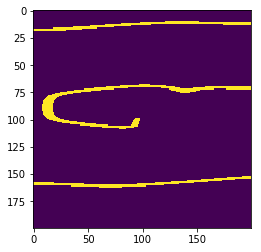

In [28]:
plt.imshow((np.sum((Ina[97:100, :, :] < -1), axis=0) > 0))

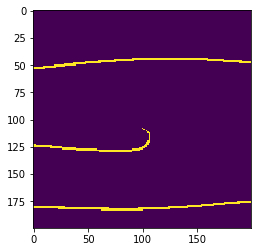

In [54]:
a = ((hj_array[96:97, :, :] < 0.1) * (hj_array[97:98, :, :] >= 0.1))
b = ((hj_array[97:98, :, :] < 0.1) * (hj_array[98:99, :, :] >= 0.1))
c = ((hj_array[98:99, :, :] < 0.1) * (hj_array[99:100, :, :] >= 0.1))
ans = a+b+c
plt.imshow(ans[0, :, :])

In [74]:
ans = np.zeros((1,200, 200))
for i in range(width):
    ans += ((hj_array[100-1-width+i:100-width+i, :, :] < 0.1) * (hj_array[100-width+i:100+1-width+i, :, :] >= 0.1))


array([ 0.,  1.])

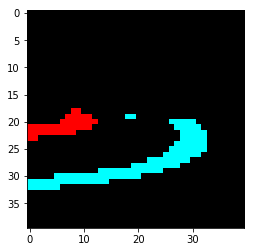

In [92]:
#100ms時
width = 3
thres = 0.1
time = 200
im_out = np.zeros([200, 200, 3], dtype=np.uint8)
# red
im_out[:, :, 0] = (np.sum((Ina[time-3:time, :, :] < -1), axis=0) > 0) * 255
# for ...
ans = np.zeros((1,200, 200))
for i in range(width):
    ans += ((hj_array[time-1-width+i:time-width+i, :, :] < 0.1) * (hj_array[time-width+i:time+1-width+i, :, :] >= 0.1))
# green
im_out[:, :, 1] = ans[0, :, :] * 255
# blue
im_out[:, :, 2] = ans[0, :, :] * 255
#plt.imshow(im_out[90:110, 90:110])
plt.imshow(im_out[110:150, 110:150])
#plt.imsave('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170721/sample2.png', im_out)

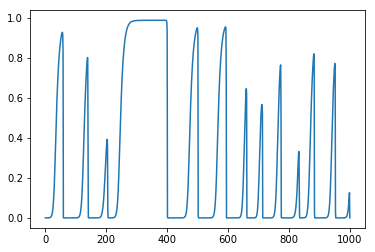

In [95]:
plt.plot(hj_array[:, 130, 130])

In [127]:
width = 10
thres = 0.1
output = '10_01_zoom'

if not os.path.exists('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/FrontAndTail/%s' % output):
    os.makedirs('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/FrontAndTail/%s' % output)


for i in range(900):
    if i < width+1:
        continue
    num = '{0:06d}'.format(i-width-1)
    im_out = np.zeros([200, 200, 3], dtype=np.uint8)
    im_out[:, :, 0] = (np.sum((Ina[i-width:i, :, :] < -1), axis=0) > 0) * 255
    ans = np.zeros((1, 200, 200))
    for j in range(width):
        ans += ((hj_array[i+j-1-width:i+j-width, :, :] < thres) * (hj_array[i+j-width:i+j+1-width, :, :] >= thres))
    im_out[:, :, 1] = (ans[0, :, :] > 0) * 255
    im_out[:, :, 2] = (ans[0, :, :] > 0) * 255
    for j in range(200):
        for k in range(200):
            if (j-100)*(j-100)+(k-135)*(k-135) < 900:
                im_out[j, k, 2] = 255
    plt.imsave('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/FrontAndTail/%s/%s.png' % (output, num), im_out[40:100, 120:180, :])
subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/FrontAndTail/{0}/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/FrontAndTail/{0}/movie.mp4"'.format(output), shell=True)

0

# zoom up

In [87]:
numbers = [370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385]
for number in numbers:
    num = '{0:06d}'.format(number)
    im_out = np.zeros([200, 200, 3], dtype=np.uint8)
    threshold = np.ones((200, 200)) * (hj_array[number, :, :] > 0.2) * (hj_array[number, :, :] < 0.4)
    im_out[:, :, 0] = (Ina[number, :, :]<-1)*255
    im_out[:, :, 1] = threshold*(1-hj_array[number, :, :])*255
    im_out[:, :, 2] = (1-hj_array[number, :, :])*255
    plt.imsave('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/threshold/%s.png' % num, im_out[55:90, 145:180, :])

In [124]:
a = np.ones((200, 200))
a[40:100, 120:180] = 0

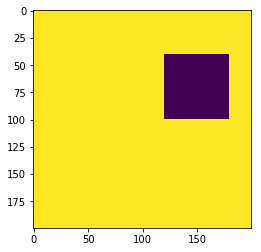

In [125]:
plt.imshow(a)
plt.imsave('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/FrontAndTail/ROI.png', a)

In [4]:
h = np.zeros((1001, 200, 200))
j = np.zeros((1001, 200, 200))
for i in range(400):
    num = '{0:04d}'.format(i)
    h[i, :, :] = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'h.npy'))
    j[i, :, :] = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'j.npy'))
for i in range(200):
    num = '{0:04d}'.format(i)
    h[i+400, :, :] = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'h.npy'))
    j[i+400, :, :] = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'j.npy'))
for i in range(400):
    num = '{0:04d}'.format(i)
    h[i+600, :, :] = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'h.npy'))
    j[i+600, :, :] = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'j.npy'))

(300, 400)

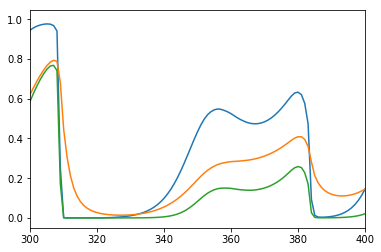

In [10]:
plt.plot(h[:, 75, 160])
plt.plot(j[:, 75, 160])
plt.plot(h[:, 75, 160]*j[:, 75, 160])
plt.xlim([300, 400])